In [1]:
import turicreate

In [40]:
sales = turicreate.SFrame.read_csv('Philadelphia_Crime_Rate_noNA.csv')
sales.head()

Read 99 lines. Lines per second: 4791.17

Finished parsing file /home/prateek/Desktop/Machine Learning Regression/Week1/Philadelphia_Crime_Rate_noNA.csv

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,float,float,float,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Parsing completed. Parsed 99 lines in 0.020731 secs.

Finished parsing file /home/prateek/Desktop/Machine Learning Regression/Week1/Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.021468 secs.

HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
124186,12.4186,19.5,25.0,8.0,Aston,Delaware
110490,11.049,49.4,25.0,2.7,Bensalem,Bucks
79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
92634,9.2634,48.6,20.0,0.6,Bristol T.,Bucks
89246,8.9246,30.8,15.0,-2.6,Brookhaven,Delaware
195145,19.5145,10.8,20.0,-3.5,Bryn Athyn,Montgome
297342,29.7342,20.2,14.0,0.6,Bryn Mawr,Montgome
264298,26.4298,20.4,26.0,6.0,Buckingham,Bucks


In [6]:
turicreate.visualization.scatter(sales['CrimeRate'],sales['HousePrice'],xlabel='Crime Rate',ylabel='House Price',title='House Price vs Crime Rate')

In [7]:
crime_model = turicreate.linear_regression.create(sales,target='HousePrice',features=['CrimeRate'],validation_set=None,verbose=False)

In [10]:
import matplotlib.pyplot as plt 
%matplotlib inline



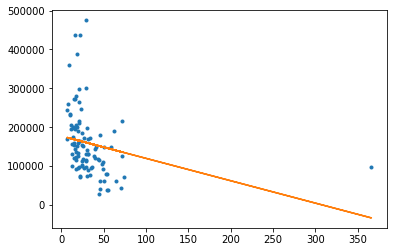

In [11]:
plt.plot(sales['CrimeRate'],sales['HousePrice'],'.',
        sales['CrimeRate'],crime_model.predict(sales),'-')

In [12]:
influencer = sales[sales['CrimeRate']==366.10]

In [13]:
influencer.head()

HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
96200,9.62,366.1,0.0,4.8,"Phila,CC",Phila


In [23]:
sales_noCC = sales[sales['MilesPhila']!=0.0]

In [25]:
turicreate.show(sales_noCC['CrimeRate'], sales_noCC['HousePrice'])

Materializing X axis SArray

Materializing Y axis SArray

In [24]:
crime_model_noCC = turicreate.linear_regression.create(
    sales_noCC,
    target='HousePrice',
    features=['CrimeRate'],
    validation_set = None,
    verbose = False
)

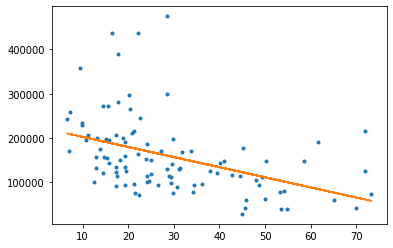

In [26]:
plt.plot(sales_noCC['CrimeRate'], sales_noCC['HousePrice'], '.',
         sales_noCC['CrimeRate'], crime_model_noCC.predict(sales_noCC), '-')

In [28]:
crime_model.coefficients

name,index,value,stderr
(intercept),None,176626.04688088183,11245.588219378817
CrimeRate,None,-576.8049490581076,226.9022595096533


In [29]:
crime_model_noCC.coefficients

name,index,value,stderr
(intercept),None,225204.60430309846,16404.024751386656
CrimeRate,None,-2287.6971744328953,491.53747812308956


In [30]:
new_sales = sales_noCC[sales_noCC['HousePrice']<=350000]

In [31]:
new_crime_model = turicreate.linear_regression.create(new_sales,target='HousePrice',features=['CrimeRate'],validation_set=None,verbose=False)

In [32]:
new_crime_model.coefficients

name,index,value,stderr
(intercept),None,199073.58961525094,11932.510110455853
CrimeRate,None,-1837.712809888713,351.51960933285284


In [33]:
crime_model_noCC.coefficients

name,index,value,stderr
(intercept),None,225204.60430309846,16404.024751386656
CrimeRate,None,-2287.6971744328953,491.53747812308956


In [ ]:
plt.plot(new_sales['CrimeRate'], new_sales['HousePrice'], '.',
         new_sales['CrimeRate'], new_crime_model.predict(new_sales), '-',
         new_sales['CrimeRate'], crime_model_noCC.predict(new_sales), '.')         